In [6]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 小数第3位まで表示
%precision 3

'%.3f'

In [7]:
from sklearn import linear_model

In [8]:
student_data_math = pd.read_csv('student-mat.csv')

In [9]:
cd chap3

[Errno 2] No such file or directory: 'chap3'
/Users/watanabeshingo/Desktop/ds/chap3


In [10]:
student_data_math = pd.read_csv('student-mat.csv')

In [11]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [12]:
student_data_math.head(10)

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."
5,"GP;""M"";16;""U"";""LE3"";""T"";4;3;""services"";""other""..."
6,"GP;""M"";16;""U"";""LE3"";""T"";2;2;""other"";""other"";""h..."
7,"GP;""F"";17;""U"";""GT3"";""A"";4;4;""other"";""teacher"";..."
8,"GP;""M"";15;""U"";""LE3"";""A"";3;2;""services"";""other""..."
9,"GP;""M"";15;""U"";""GT3"";""T"";3;4;""other"";""other"";""h..."


In [13]:
# データの読み込み
# 区切りに";"がついているので注意
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

In [15]:
student_data_math.groupby('sex')['G3'].mean()

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

In [16]:
student_data_math.groupby('sex')['absences'].mean()

sex
F    6.216346
M    5.144385
Name: absences, dtype: float64

In [17]:
student_data_math.groupby('address')['G3'].mean()

address
R     9.511364
U    10.674267
Name: G3, dtype: float64

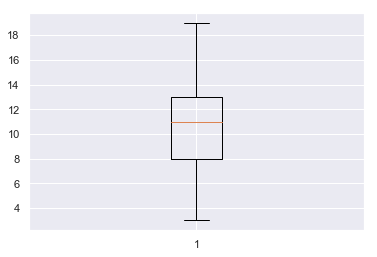

In [18]:
plt.boxplot(student_data_math['G1'])
plt.grid(True)

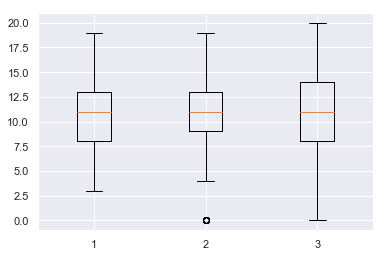

In [19]:
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

In [20]:
student_data_math['absences'].std() / student_data_math['absences'].mean()

1.402

In [21]:
student_data_math.std() / student_data_math.mean() 

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

In [18]:
data_por = pd.read_csv("student-por.csv")
data_por.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [22]:
data_por = pd.read_csv("student-por.csv", sep = ";")
data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [23]:
print("平均値:", data_por.mean())

平均値: age           16.744222
Medu           2.514638
Fedu           2.306626
traveltime     1.568567
studytime      1.930663
failures       0.221880
famrel         3.930663
freetime       3.180277
goout          3.184900
Dalc           1.502311
Walc           2.280431
health         3.536210
absences       3.659476
G1            11.399076
G2            11.570108
G3            11.906009
dtype: float64


In [24]:
print("中央値:", data_por.median())

中央値: age           17.0
Medu           2.0
Fedu           2.0
traveltime     1.0
studytime      2.0
failures       0.0
famrel         4.0
freetime       3.0
goout          3.0
Dalc           1.0
Walc           2.0
health         4.0
absences       2.0
G1            11.0
G2            11.0
G3            12.0
dtype: float64


In [25]:
print("最頻値:", data_por.mode())

最頻値:   school sex  age address famsize Pstatus  Medu  Fedu   Mjob   Fjob ...  \
0     GP   F   17       U     GT3       T     2     2  other  other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      3     1     1      5        0  10  11  11  

[1 rows x 33 columns]


In [26]:
print('最頻値：', student_data_math['absences'].mode())

最頻値： 0    0
dtype: int64


In [27]:
print("最頻値:", data_por["absences"].mode())

最頻値: 0    0
dtype: int64


In [28]:
print("中央値:", data_por.median())

中央値: age           17.0
Medu           2.0
Fedu           2.0
traveltime     1.0
studytime      2.0
failures       0.0
famrel         4.0
freetime       3.0
goout          3.0
Dalc           1.0
Walc           2.0
health         4.0
absences       2.0
G1            11.0
G2            11.0
G3            12.0
dtype: float64


In [29]:
data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [30]:
pd.merge("sudent-mat.csv", "student-por.csv")

ValueError: can not merge DataFrame with instance of type <class 'str'>

In [31]:
student_data_por = pd.read_csv("student-por.csv", sep = ";")
student_dara_math = pd.read_csv("student-mat.csv", sep = ";")
student_data_merge = pd.merge(student_data_math
                                                    , student_data_por
                                                    , on = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet']
                                                    , suffixes = ('_math', '_por')
                                                )
student_data_merge.describe()


,age,Medu,Fedu,traveltime_math,studytime_math,failures_math,famrel_math,freetime_math,goout_math,Dalc_math,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,...,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,...,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


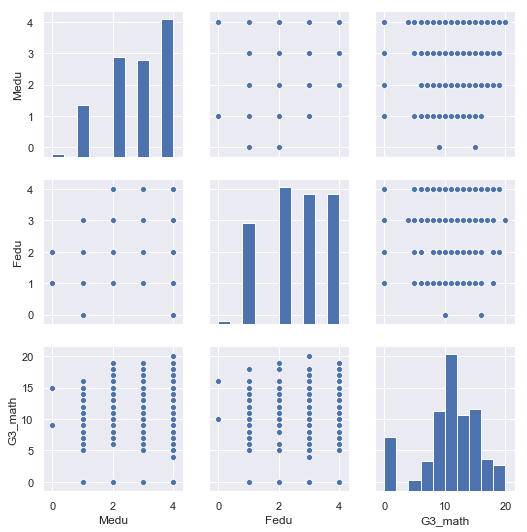

In [32]:
sns.pairplot(student_data_merge[['Medu', 'Fedu', 'G3_math']])
plt.grid(True)

In [33]:
# 散布図
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

KeyError: 'G1'

In [35]:
# 箱ひげ図：G1
plt.boxplot(student_data_math['G1'])
plt.grid(True)

KeyError: 'G1'